# Introduction to the problem
<br>
Modern Portfolio Theory

In this module, We’ll be looking at investment portfolio optimization with python, the fundamental concept of diversificationand the creation of an efficient frontier that can be used by investors to choose specific mixes of assets based oninvestment goals; that is, the trade off between their desired level of portfolio return vs their desired level of portfolio risk.

Modern Portfolio Theory (https://www.investopedia.com/terms/m/modernportfoliotheory.asp)
suggests that it is possible toconstruct an "efficient frontier" of optimal portfolios, offering the maximum possible expected return for a given level of risk.It suggests that it is not enough to look at the expected risk and return of one particular stock. By investing in more than onestock, an investor can reap the benefits of diversification, particularly a reduction in the riskiness of the portfolio. MPTquantifies the benefits of diversification, also known as not putting all of your eggs in one basket.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#mpt quantifies the benefits of diversificaiton and not putting all your investments into one basket


<b> Problem Statement 5.1</b>

For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualisethem to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean * 252 , annual stdev= daily stdev * sqrt(252) )

In [5]:
data=pd.read_csv("data/HDFCBANK.csv")
data=data[data.Series=='EQ']
data.dropna(inplace=True)
data=data['Close Price']
data

0      1553.40
2      1559.65
3      1557.15
5      1557.10
7      1561.25
        ...   
604    2322.35
605    2307.25
606    2290.90
607    2296.50
608    2287.20
Name: Close Price, Length: 494, dtype: float64

In [6]:
returns=data.pct_change()
mean_return=returns.mean()
return_stdev=returns.std()

annualised_return=round(mean_return*252,2)
annualised_stdev=round(return_stdev*np.sqrt(252),2)
print('The annualised mean return of the stock is', annualised_return)
print('The annualised volatility is', annualised_stdev)

The annualised mean return of the stock is 0.21
The annualised volatility is 0.15


<b> Problem Statement 5.2 </b>

Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectorsand different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility ofthe entire portfolio ( Hint : Don't forget to use the covariance )

In [7]:
#from results the return is good but the risk is also as well as high.
#single portfolio has a collection of many stocks.

#Query 2 has many portfolios of our own

d1=pd.read_csv('data/TITAN.csv')
d2=pd.read_csv('data/BAJFINANCE.csv')
d3=pd.read_csv('data/TCS.csv')
d4=pd.read_csv('data/CIPLA.csv')
d5=pd.read_csv('data/AXISBANK.csv')
d1=d1[d1.Series=='EQ']
d2=d2[d2.Series=='EQ']
d3=d3[d3.Series=='EQ']
d4=d4[d4.Series=='EQ']
d5=d5[d5.Series=='EQ']
d1.dropna(inplace=True)
d2.dropna(inplace=True)
d3.dropna(inplace=True)
d4.dropna(inplace=True)
d5.dropna(inplace=True)
data=pd.concat([d1['Close Price'],d2['Close Price'],d3['Close Price'],d4['Close Price'],d5['Close Price']],axis=1)
data.columns=['TITAN','BAJAJ','TCS','CIPLA','AXIS']
data

,TITAN,BAJAJ,TCS,CIPLA,AXIS
0,483.65,1332.95,2365.10,569.00,500.10
1,488.30,1347.75,2429.15,565.60,501.50
2,481.75,1324.80,2455.35,562.35,502.80
3,471.65,1314.55,2536.20,560.10,492.00
4,471.15,1289.15,2507.15,564.95,501.70
...,...,...,...,...,...
493,1104.45,2922.85,2151.95,557.75,735.05
494,1132.10,2931.85,2152.85,555.55,732.10
495,1144.70,NaN,2172.55,546.70,NaN
496,NaN,NaN,2135.80,NaN,NaN


In [8]:
returns=data.pct_change()

#calculating mean of daily reutrns and covariance
mean_daily_returns=returns.mean()
cov_matrix=returns.cov()

#setting array field for holding the portfolio weights
weights=np.array([0.20,0.20,0.20,0.20,0.20])

#calculating annualised portfolio returns
portfolio_return=round(np.sum(mean_daily_returns*weights)*252,2)

#calculating annualised portfolio volatility
portfolio_stdev=round(np.sqrt(np.dot(weights.T, np.dot(cov_matrix,weights)))*np.sqrt(252),2) #multiplying transpose of the weight matrix
#with the transpose of the covariance matrix again with the weight and ensuring the dot product

print('The annualised mean returns of the stock is',portfolio_return)
print('The annualised  volatility of the stock is',portfolio_stdev)


The annualised mean returns of the stock is 0.25
The annualised  volatility of the stock is 0.16


<b> Problem Statement 5.3 </b>

Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns andvolatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

<b>Problem Statement 5.4</b>

Mark the 2 portfolios where -
Portfolio 1 - The Sharpe ratio is the highest
Portfolio 2 - The volatility is the lowest.

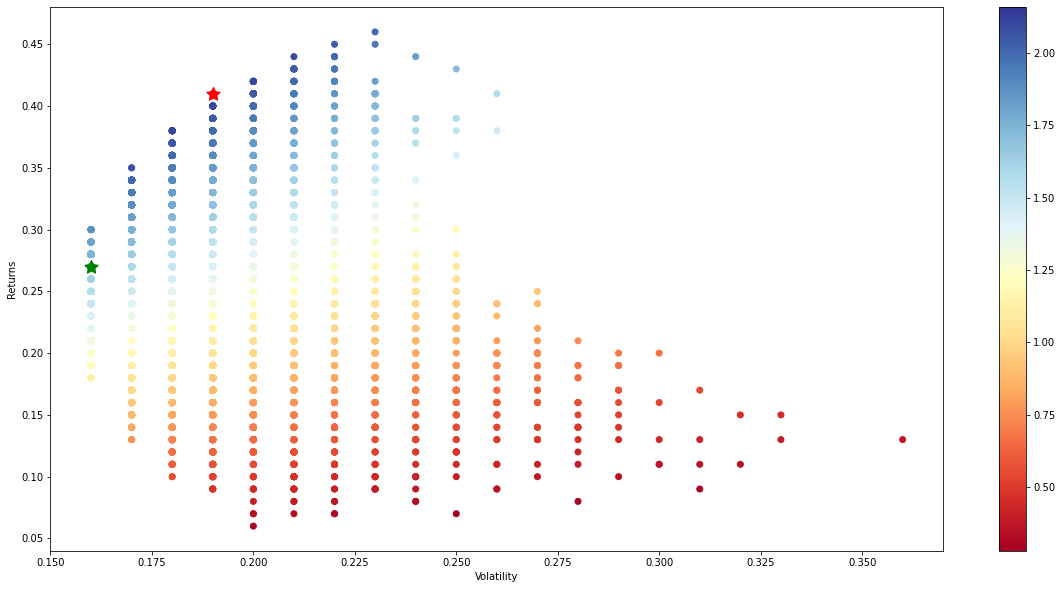

In [9]:
#query 3 and 4
from matplotlib.pyplot import figure
figure(figsize=(20,10))

#set number of runs of random portfolio weights
num_portfolios=25000

#we have increased the size of the array to hold the weight values for each stock
results=np.zeros((3+data.columns.size,num_portfolios))

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights=np.array(np.random.random(data.columns.size))
    #rebalance the weights to sum 1
    weights /=np.sum(weights)
    
    #calculate portfolio rate and volatility
    portfolio_return=round(np.sum(mean_daily_returns*weights)*252,2)
    portfolio_stdev=round(np.sqrt(np.dot(weights.T, np.dot(cov_matrix,weights)))*np.sqrt(252),2)
    
    #storing the results into the results array
    results[0,i]=portfolio_return
    results[1,i]=portfolio_stdev
    
    #store the sharpe ration(RETURN/VOLATILITY) -risk free element excluded for simplicity
    results[2,i]=results[0,i]/results[1,i]
    
    #iterate through the weight vector and add data to the results array
    for j in range(len(weights)):
        results[j+3,i]=weights[j]

        
#Convert results array to pandas dataframe

results_frame=pd.DataFrame(results.T,columns=['ret','stdev','sharpe','TITAN','BAJAJ','TCS','CIPLA','AXIS'])

#locate position of portfolio with highest Sharp Ratio

max_sharpe_port=results_frame.iloc[results_frame['sharpe'].idxmax()]

#Locating position of theportfoliowith minimum standard deviation

min_vol_port=results_frame.iloc[results_frame['stdev'].idxmin()]

#Creating scatter plot coloured by sharpe ratio

plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

#plotting red star to highlight positionof the portfolio witht the highest sharpe ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=200)

#plotting green star to highlight the position of minimum variance in the portfolio

plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=200)


